In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
print("GPU Available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: True


In [6]:
import os
import pandas
import numpy as np
import cv2
from random import randint
import matplotlib.pyplot as plt
import time
import seaborn as sns

# Eksploracyjna analiza danych

## Dataframe z podstawowymi danymi z pliku csv oraz rozmiaru.

In [4]:
data_path = 'drive/MyDrive/Dog Emotion/'

class_names = sorted(os.listdir(data_path))
# usunięcie pliku labels.csv, ponieważ to nie klasa
class_names.remove('labels.csv')
num_classes = len(class_names)

print('classes:', class_names)

labels_df = pandas.read_csv(data_path + '/labels.csv')
print("Plik csv:")
print(labels_df)

df = pandas.read_csv(data_path + '/labels.csv')
labels = []
images_no_modifications = []
image_width_list = []
image_height_list = []
image_channels_list = []
image_proportions_list = []
for image in labels_df.iloc:
                #drive/MyDrive/Dog Emotion/   etykieta   /    nazwa pliku                   BGR na RGB
    img = (np.asarray(cv2.imread(data_path + image[2] + '/' + image[1], cv2.IMREAD_COLOR)[:, :, ::-1]))
    images_no_modifications.append(img)
    image_height_list.append(img.shape[0])
    image_width_list.append(img.shape[1])
    image_channels_list.append(img.shape[2])
    image_proportions_list.append(img.shape[0]/img.shape[1])

    # Etykiety będą w formacie [A, B, C, D], gdzie jedna z wartości przyjmie wartość 1, a reszta 0
    label = np.zeros(num_classes)
    label[class_names.index(image[2])] = 1
    labels.append(label)

labels = np.asarray(labels)
df['height'] = image_height_list
df['width'] = image_width_list
df['channels'] = image_channels_list
df['proportions'] = image_proportions_list
print("Dataframe po dodaniu kolumn związanych z rozmiarem")
print(df)

classes: ['angry', 'happy', 'relaxed', 'sad']
Plik csv:
      Unnamed: 0                               filename    label
0              0  yubL63eiiPmoRru8Z2K2yRo0NnGDCL683.jpg      sad
1              1  c1tVljKiLM9q2zTBuQGWpxmzBuSeBR437.jpg      sad
2              2  RbzNOvY5GIAl3PSjIRTKpEkQs1NByq575.jpg    angry
3              3  gKujaBuWYezz0yWK9ydTFVi6LbQtXe397.jpg    angry
4              4  U0hJ2ryOu1IOuYpc01O7RngPYa8Xvz795.jpg  relaxed
...          ...                                    ...      ...
3995        3995   3e7ne7hPR6zHzv8kjUkZ0DKoJNatJX22.jpg    angry
3996        3996  VxNty5XbeMojF1gpkRYG4yyBySQ4sC351.jpg  relaxed
3997        3997  i6WrJri63JSzctcnOJ8C94Nb5Gyugo629.jpg      sad
3998        3998  LMrUNwljuck3MxuzNaBbeAEMkofN7Q718.jpg    angry
3999        3999  R9SA3mjD5yhNT0aywMpsxCMy0Zkc94974.jpg    angry

[4000 rows x 3 columns]
Dataframe po dodaniu kolumn związanych z rozmiarem
      Unnamed: 0                               filename    label  height  \
0           

## Wyświetlenie 9 obrazków

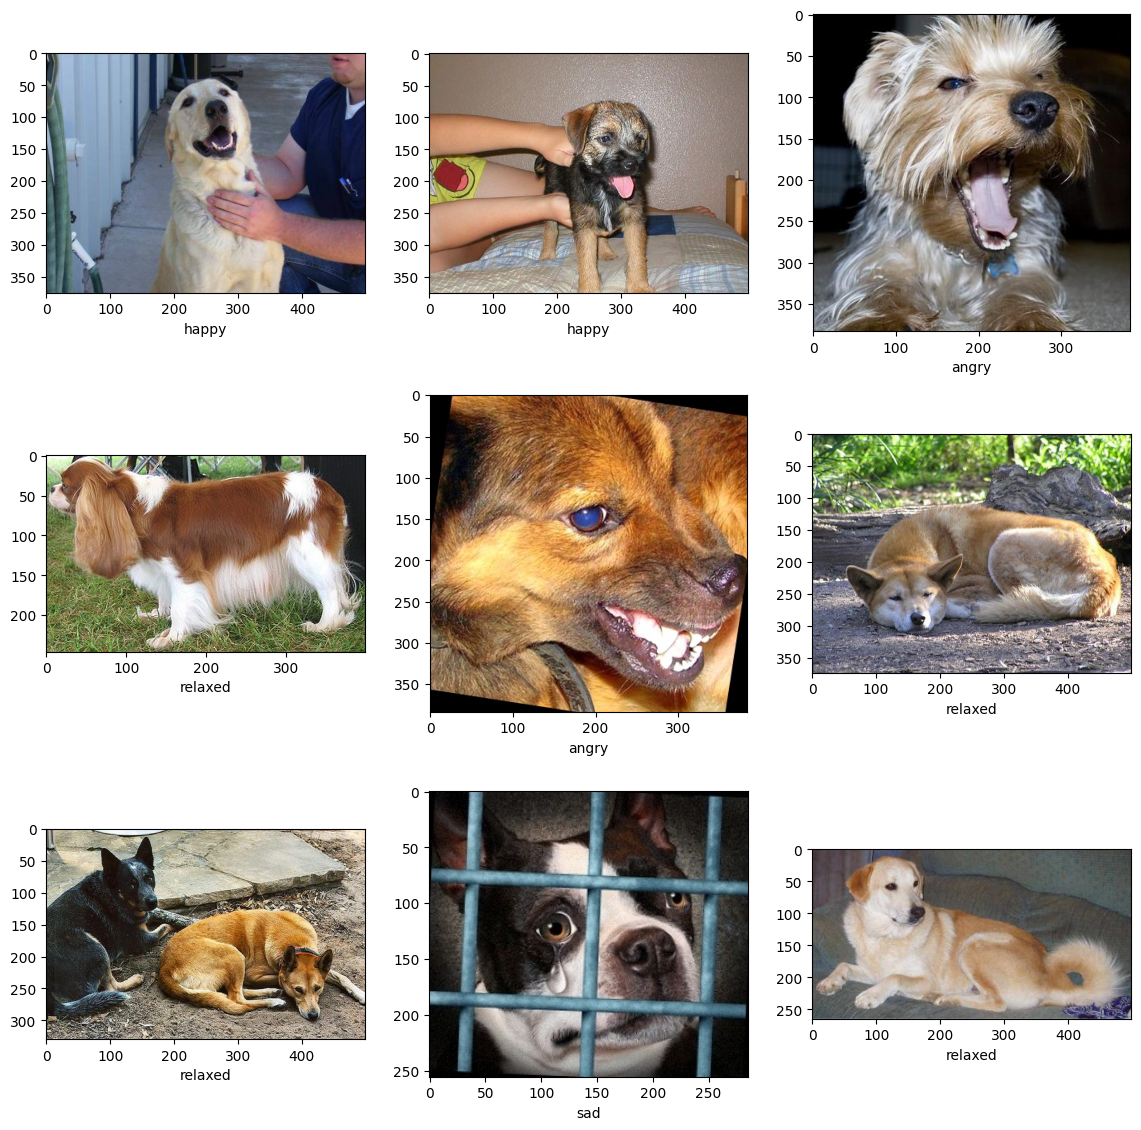

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

for x in range(3):
    for y in range(3):
        i = randint(0, len(images_no_modifications))-1

        axs[x][y].imshow(images_no_modifications[i])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

## Średnia, mediana, najczęściej występująca wartość, różnica między min a max, odchylenie standardowe.

In [17]:
mean_width = df['width'].mean()
median_width = df['width'].median()
mode_width = df['width'].mode().values[0]  # Moda może mieć kilka wartości, bierzemy pierwszą
range_width = df['width'].max() - df['width'].min()
std_dev_width = df['width'].std()

mean_height = df['height'].mean()
median_height = df['height'].median()
mode_height = df['height'].mode().values[0] # Moda może mieć kilka wartości, bierzemy pierwszą
range_height = df['height'].max() - df['height'].min()
std_dev_height = df['height'].std()

print(f'Szerokość: Średnia: {mean_width}, Mediana: {median_width}, Najczęściej występująca wartość: {mode_width}, Zakres: {range_width}, Odchylenie standardowe: {std_dev_width}')
print(f'Wysokość: Średnia: {mean_height}, Mediana: {median_height}, Najczęściej występująca wartość: {mode_height}, Zakres: {range_height}, Odchylenie standardowe: {std_dev_height}')


Szerokość: Średnia: 417.8225, Mediana: 384.0, Najczęściej występująca wartość: 384, Zakres: 3255, Odchylenie standardowe: 141.2689959830412
Wysokość: Średnia: 388.9135, Mediana: 384.0, Najczęściej występująca wartość: 384, Zakres: 3000, Odchylenie standardowe: 116.29768400779267


## Rozkład emocji na podstawie pliku csv (w opisie jest napisane, że jest ich po 1000, co potwierdza zawartość folderów, ale można sprawdzić plik csv w wypadku ewentualnych błędów).

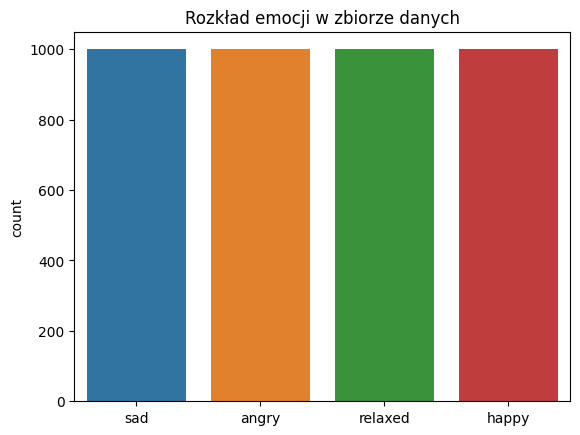

In [26]:
sns.countplot(x='label', data=df)
plt.title('Rozkład emocji w zbiorze danych')
plt.xlabel('')
plt.show()

## Histogramy rozkładu szerokości i wysokości obrazków, pogrupowany aby było dokładnie 30 słupków (bins)

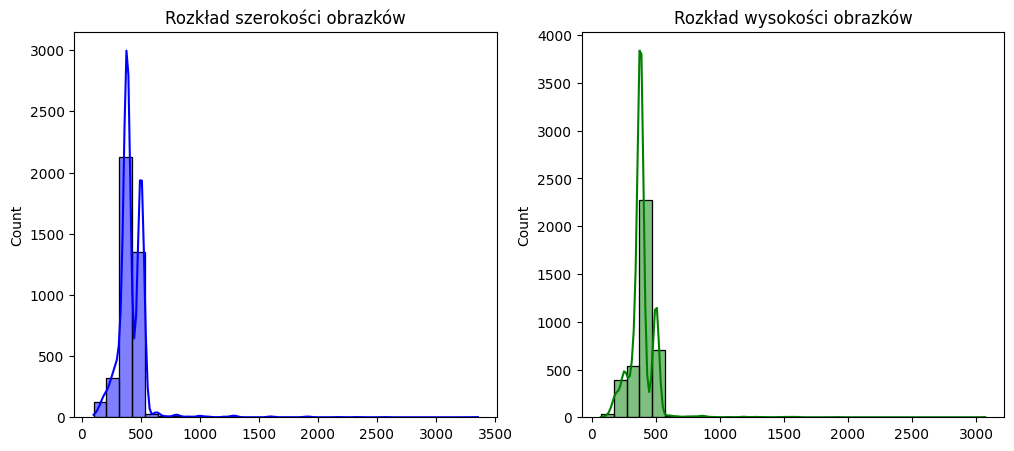

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['width'], bins=30, kde=True, color='blue')
plt.title('Rozkład szerokości obrazków')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.histplot(df['height'], bins=30, kde=True, color='green')
plt.title('Rozkład wysokości obrazków')
plt.xlabel('')
plt.show()

## Histogramy rozkładu proporcji obrazków.

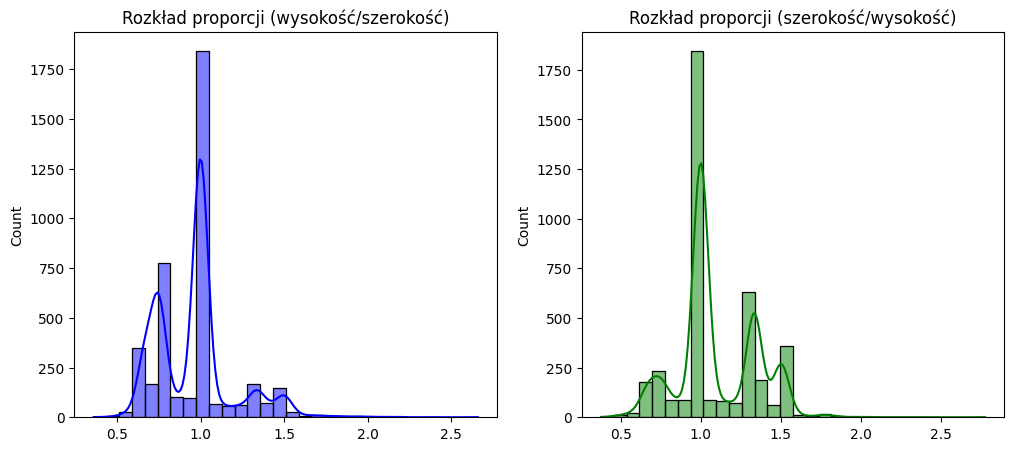

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['proportions'], bins=30, kde=True, color='blue')
plt.title('Rozkład proporcji (wysokość/szerokość)')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.histplot(1/df['proportions'], bins=30, kde=True, color='green')
plt.title('Rozkład proporcji (szerokość/wysokość)')
plt.xlabel('')
plt.show()

### Na podstawie tego, że najczęstsza wysokość i szerokość wynoszą po 384px (co potwierdzają histogramy) i najczęstsze proporcje to okolice 1x1, najlepiej byłoby ujednolicić obrazki do rozmiaru 384x384. Może to być jednak spore obciążenie dla modelu, więc lepiej rozważyć mniejsze rozmiary, np. 192x192.

## Kernel Density Ploty i Box Ploty (wraz z grupowaniem na emocję).

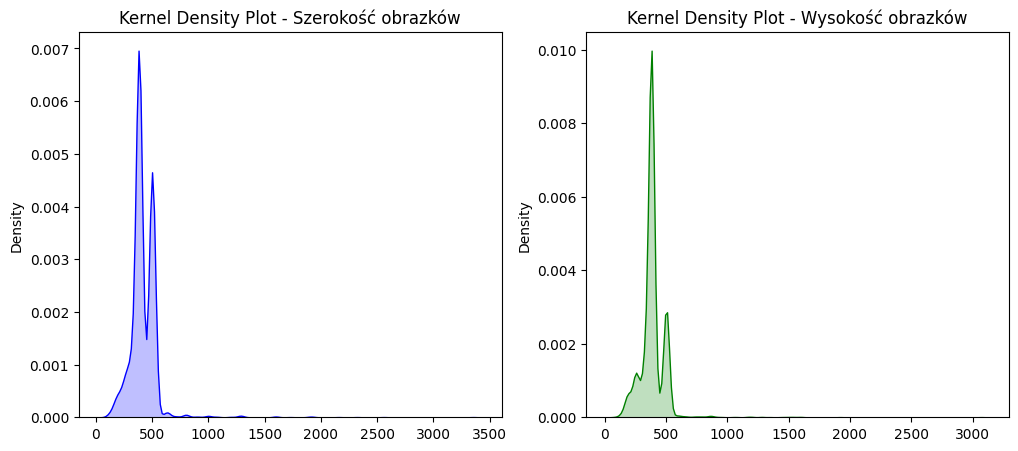

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(df['width'], color='blue', fill=True)
plt.title('Kernel Density Plot - Szerokość obrazków')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.kdeplot(df['height'], color='green', fill=True)
plt.title('Kernel Density Plot - Wysokość obrazków')
plt.xlabel('')

plt.show()

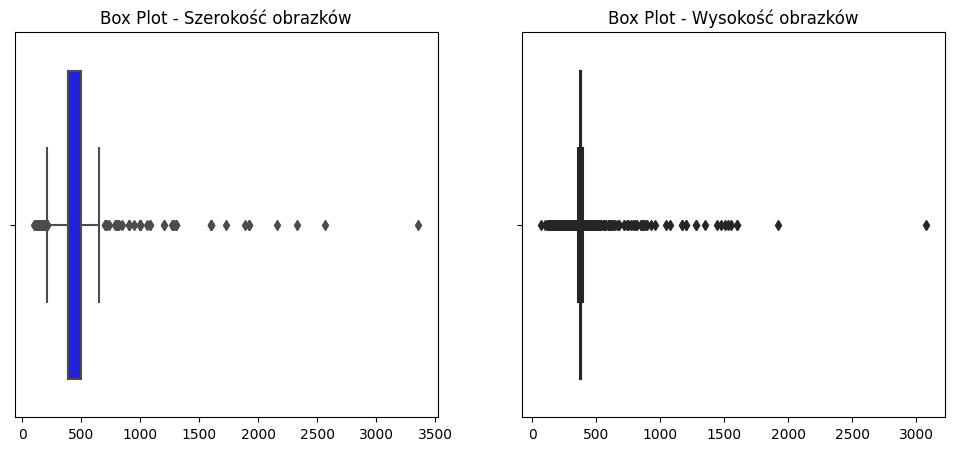

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['width'], color='blue')
plt.title('Box Plot - Szerokość obrazków')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['height'], color='green')
plt.title('Box Plot - Wysokość obrazków')
plt.xlabel('')

plt.show()

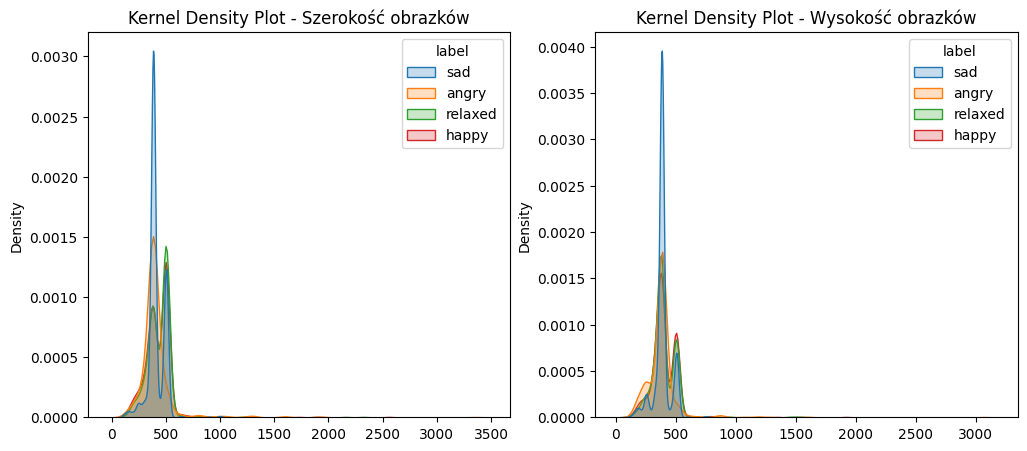

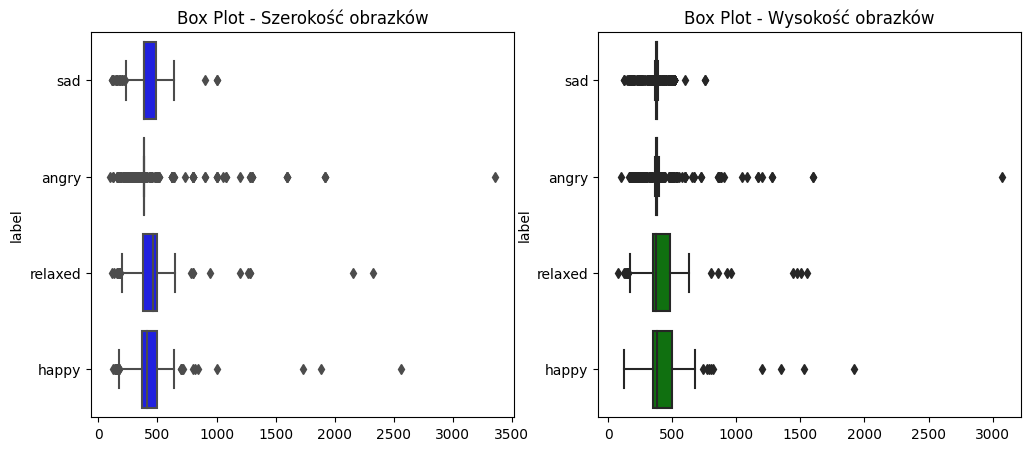

In [31]:
# Dodanie grupowania (hue)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='width', hue='label', fill=True)
plt.title('Kernel Density Plot - Szerokość obrazków')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='height', hue='label', fill=True)
plt.title('Kernel Density Plot - Wysokość obrazków')
plt.xlabel('')

plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='width', y='label', color='blue')
plt.title('Box Plot - Szerokość obrazków')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='height', y='label', color='green')
plt.title('Box Plot - Wysokość obrazków')
plt.xlabel('')

plt.show()

## Scatter plot z rozróżnieniem na emocje.

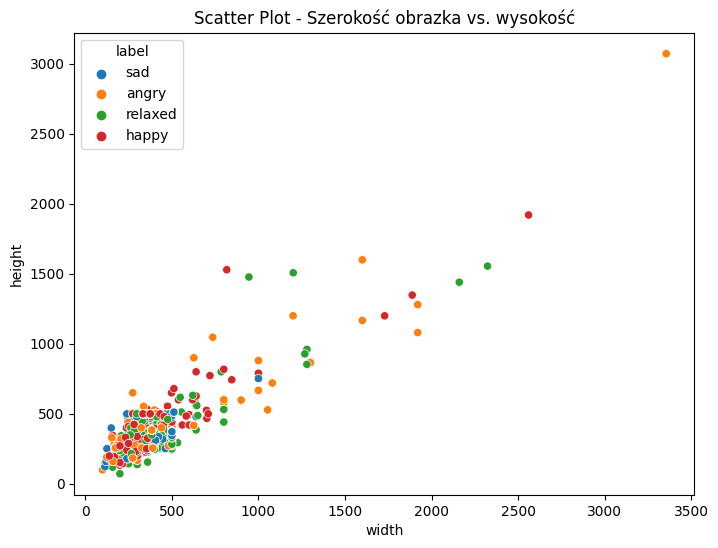

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='width', y='height', hue='label', data=df)
plt.title('Scatter Plot - Szerokość obrazka vs. wysokość')
plt.show()

## Heatmapy 9 losowych obrazków.

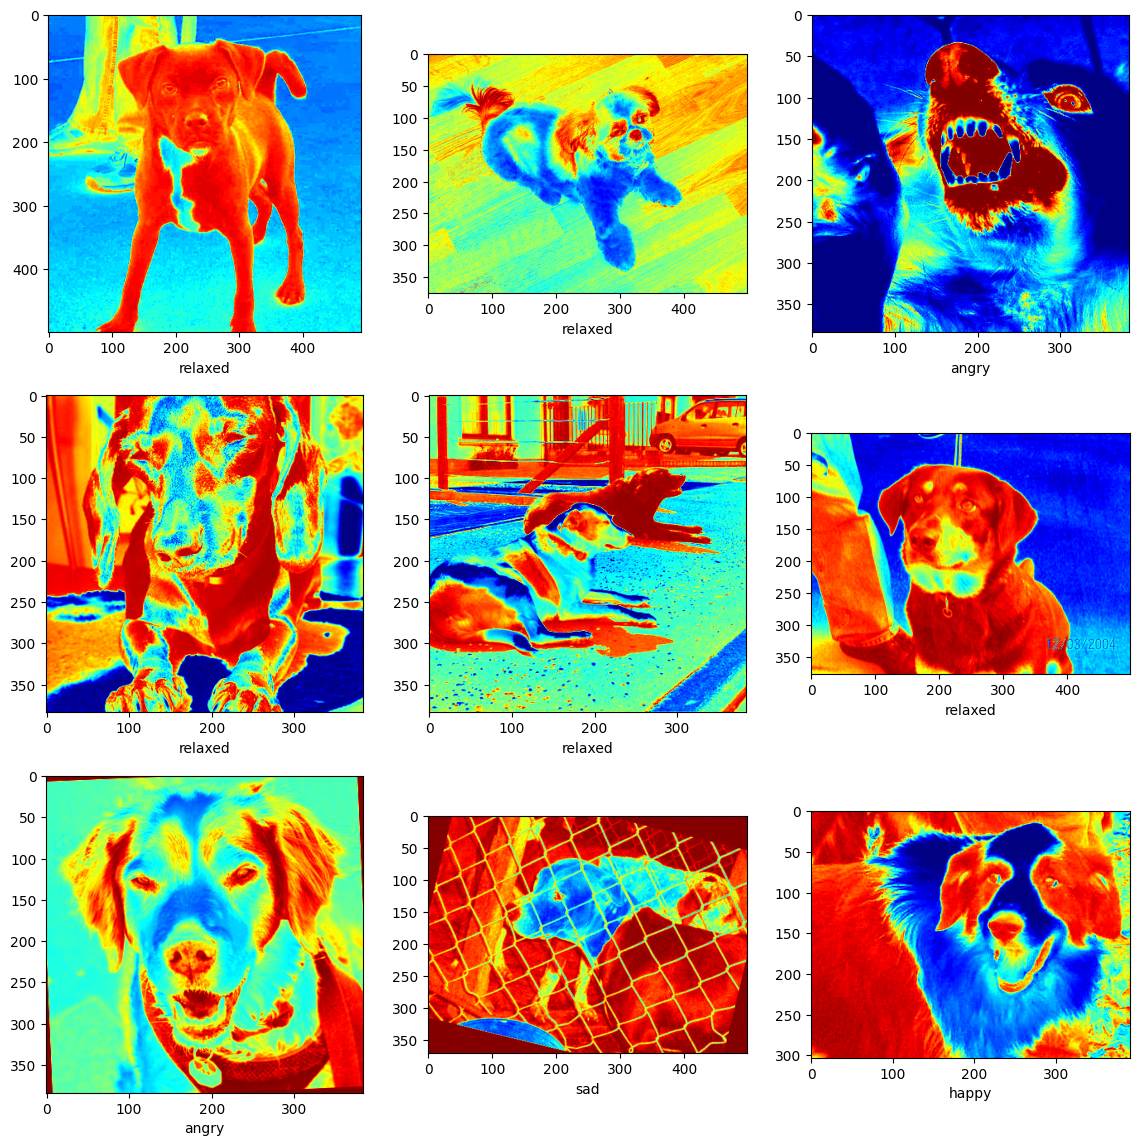

In [33]:
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

for x in range(3):
    for y in range(3):
        i = randint(0, len(images_no_modifications))-1

        axs[x][y].imshow(cv2.applyColorMap(images_no_modifications[i], colormap=cv2.COLORMAP_JET))
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

## Histogramy rozkładu poszczególnych kolorów obrazka.

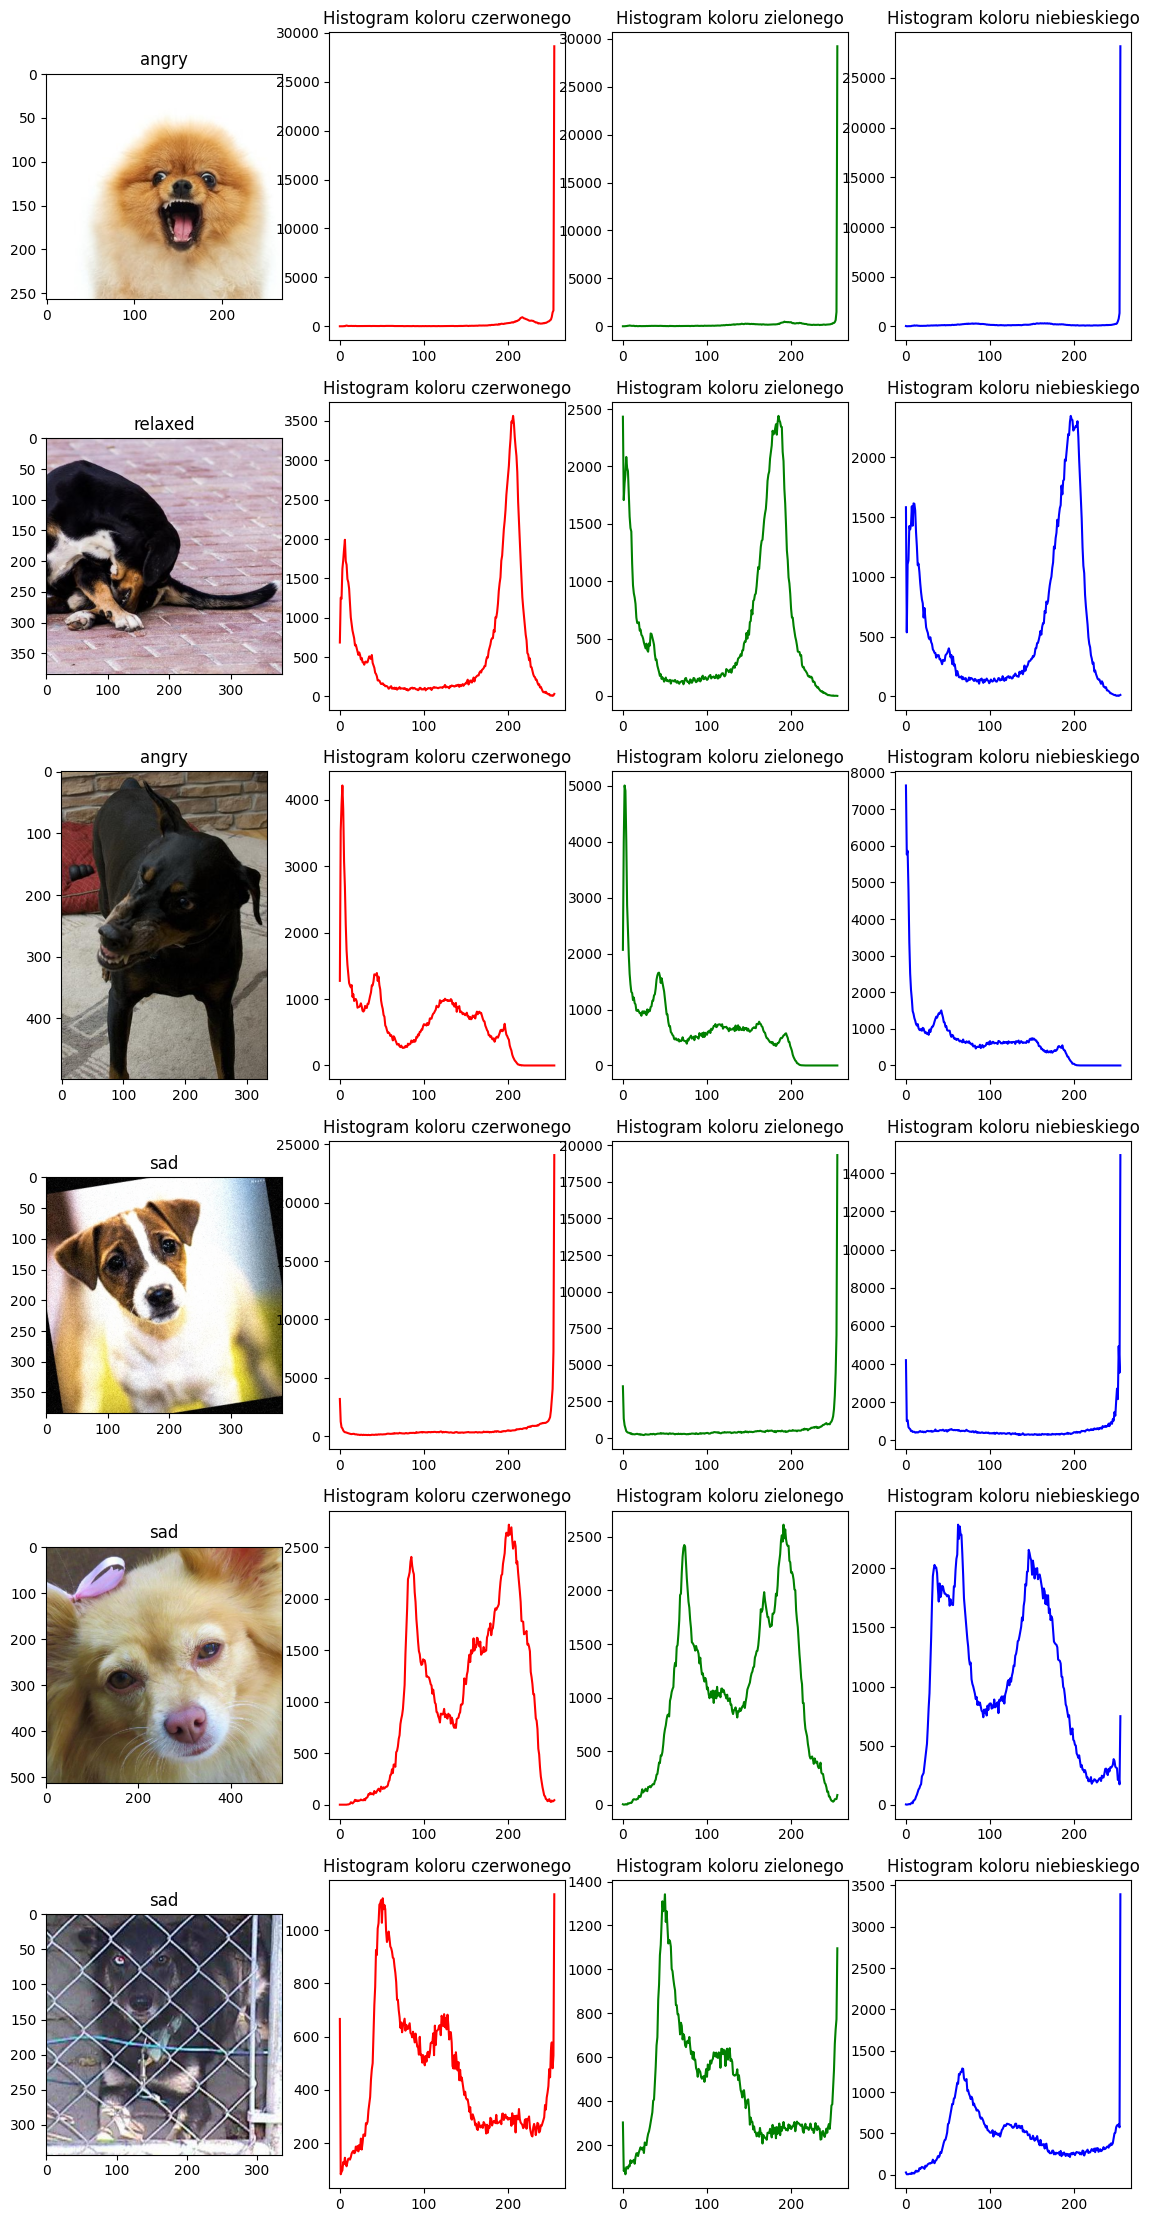

In [34]:
fig, axs = plt.subplots(6, 4, figsize=(14, 28))

for x in range(6):
    i = randint(0, len(images_no_modifications))-1
    img_h = images_no_modifications[i]

    # Podział obrazka na kanały RGB
    r_channel = img_h[:,:,0]
    g_channel = img_h[:,:,1]
    b_channel = img_h[:,:,2]

    # Policzenie histogramów dla każdego obrazka
    r_hist, r_bins = np.histogram(r_channel.flatten(), bins=256, range=[0, 256])
    g_hist, g_bins = np.histogram(g_channel.flatten(), bins=256, range=[0, 256])
    b_hist, b_bins = np.histogram(b_channel.flatten(), bins=256, range=[0, 256])

    axs[x][0].imshow(img_h)
    axs[x][0].set_title(class_names[np.argmax(labels[i])])

    axs[x][1].plot(r_hist, color='red')
    axs[x][1].set_title('Histogram koloru czerwonego')

    axs[x][2].plot(g_hist, color='green')
    axs[x][2].set_title('Histogram koloru zielonego')

    axs[x][3].plot(b_hist, color='blue')
    axs[x][3].set_title('Histogram koloru niebieskiego')

plt.show()


# Przygotowanie danych do uczenia

In [9]:
data_path = 'drive/MyDrive/Dog Emotion/'

class_names = sorted(os.listdir(data_path))
# usunięcie pliku labels.csv, ponieważ to nie klasa
class_names.remove('labels.csv')
num_classes = len(class_names)

images = []
labels = []
img_size = (192, 192, 3)
labels_df = pandas.read_csv(data_path + '/labels.csv')

for image in labels_df.iloc:
                                            #work/Dog Emotion/   etykieta   /    nazwa pliku                                BGR na RGB
    images.append(np.asarray(cv2.resize(cv2.imread(data_path + image[2] + '/' + image[1], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
    # Etykiety będą w formacie [A, B, C, D], gdzie jedna z wartości przyjmie wartość 1, a reszta 0
    label = np.zeros(num_classes)
    label[class_names.index(image[2])] = 1
    labels.append(label)
images = np.asarray(images)
labels = np.asarray(labels)
print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')


labels shape: (4000, 4)
images shape: (4000, 192, 192, 3)


In [36]:
for i in range(20):
    print(labels[randint(0, len(labels))-1])

[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]


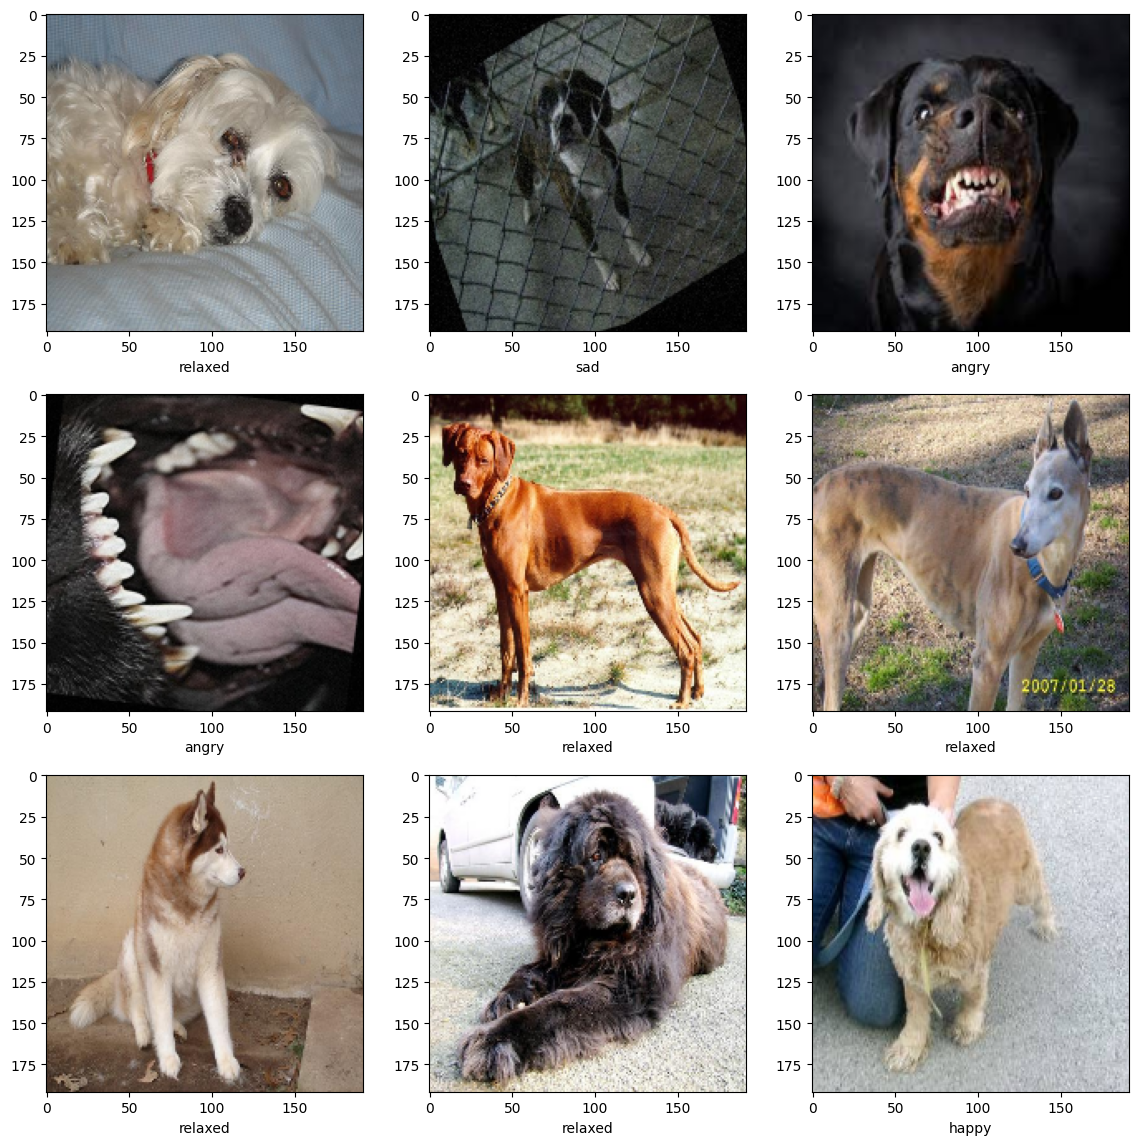

In [37]:
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

for x in range(3):
    for y in range(3):
        i = randint(0, len(images))-1

        axs[x][y].imshow(images[i])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

# First model (Keras)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.20, random_state=42)

print(f'Kształt X_train: {X_train.shape}\nKształt y_train: {y_train.shape}\n\nKształt X_val: {X_val.shape}\nKształt y_val: {y_val.shape}')

Kształt X_train: (3200, 192, 192, 3)
Kształt y_train: (3200, 4)

Kształt X_val: (800, 192, 192, 3)
Kształt y_val: (800, 4)


In [57]:
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization
from keras.utils import to_categorical
import tensorflow as tf
from keras.metrics import Precision, Recall

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(192, 192, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 192, 192, 32)      896       
                                                                 
 activation_16 (Activation)  (None, 192, 192, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 96, 96, 32)        0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_4 (Bat  (None, 96, 96, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 96, 96, 64)       

In [59]:
trained = model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val))

Epoch 1/8
100/100 [==============================] - 152s 2s/step - loss: 1.8538 - categorical_accuracy: 0.2872 - precision: 0.2770 - recall: 0.0763 - val_loss: 1.3786 - val_categorical_accuracy: 0.2812 - val_precision: 1.0000 - val_recall: 0.0012
Epoch 2/8
100/100 [==============================] - 152s 2s/step - loss: 1.3761 - categorical_accuracy: 0.2637 - precision: 0.3585 - recall: 0.0059 - val_loss: 1.3263 - val_categorical_accuracy: 0.3113 - val_precision: 0.5294 - val_recall: 0.0113
Epoch 3/8
100/100 [==============================] - 150s 1s/step - loss: 1.3660 - categorical_accuracy: 0.2919 - precision: 0.4444 - recall: 0.0162 - val_loss: 1.3424 - val_categorical_accuracy: 0.3162 - val_precision: 0.6250 - val_recall: 0.0063
Epoch 4/8
100/100 [==============================] - 151s 2s/step - loss: 1.3436 - categorical_accuracy: 0.3122 - precision: 0.4956 - recall: 0.0353 - val_loss: 1.2962 - val_categorical_accuracy: 0.3338 - val_precision: 0.3913 - val_recall: 0.0113
Epoch 5/

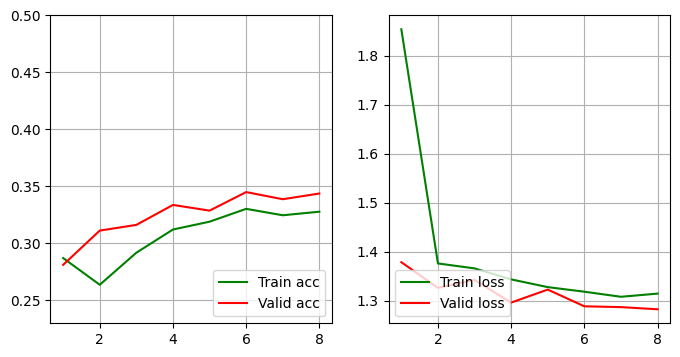

In [60]:
epochs = np.arange(len(trained.history['val_loss'])) + 1
fig = plt.figure(figsize=(8, 4))
if 'categorical_accuracy' in trained.history:
    f1 = fig.add_subplot(121)
    f1.plot(epochs, trained.history['categorical_accuracy'], c='g', label='Train acc')
    f1.plot(epochs, trained.history['val_categorical_accuracy'], c='r', label='Valid acc')
    plt.legend(loc='lower right')
    plt.ylim(0.23, 0.5)
    plt.grid(True)
    f2 = fig.add_subplot(122)
    f2.plot(epochs, trained.history['loss'], c='g', label='Train loss')
    f2.plot(epochs, trained.history['val_loss'], c='r', label='Valid loss')
    plt.legend(loc='lower left')
    plt.grid(True)
plt.show()

## Więcej metryk

In [13]:
def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall + 1e-10)  # Dodaję niewielką wartość by uniknąć dzielenia przez 0

def plot_metrics(history):
    epochs = range(1, len(history.history['categorical_accuracy']) + 1)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Categorical Accuracy
    plt.subplot(2, 3, 1)
    plt.plot(epochs, history.history['categorical_accuracy'], label='Train')
    plt.plot(epochs, history.history['val_categorical_accuracy'], label='Test')
    plt.title('Categorical Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Categorical Accuracy')
    plt.legend()
    plt.xticks(epochs)

    # Loss
    plt.subplot(2, 3, 2)
    plt.plot(epochs, history.history['loss'], label='Train')
    plt.plot(epochs, history.history['val_loss'], label='Test')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.xticks(epochs)

    # Precision
    plt.subplot(2, 3, 3)
    plt.plot(epochs, history.history['precision'], label='Train')
    plt.plot(epochs, history.history['val_precision'], label='Test')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.xticks(epochs)

    # Recall
    plt.subplot(2, 3, 4)
    plt.plot(epochs, history.history['recall'], label='Train')
    plt.plot(epochs, history.history['val_recall'], label='Test')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.xticks(epochs)

    # F1-Score
    plt.subplot(2, 3, 5)
    train_f1 = [calculate_f1_score(p, r) for p, r in zip(history.history['precision'], history.history['recall'])]
    test_f1 = [calculate_f1_score(p, r) for p, r in zip(history.history['val_precision'], history.history['val_recall'])]
    plt.plot(epochs, train_f1, label='Train')
    plt.plot(epochs, test_f1, label='Test')
    plt.title('F1-Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.xticks(epochs)

    plt.tight_layout()
    plt.show()

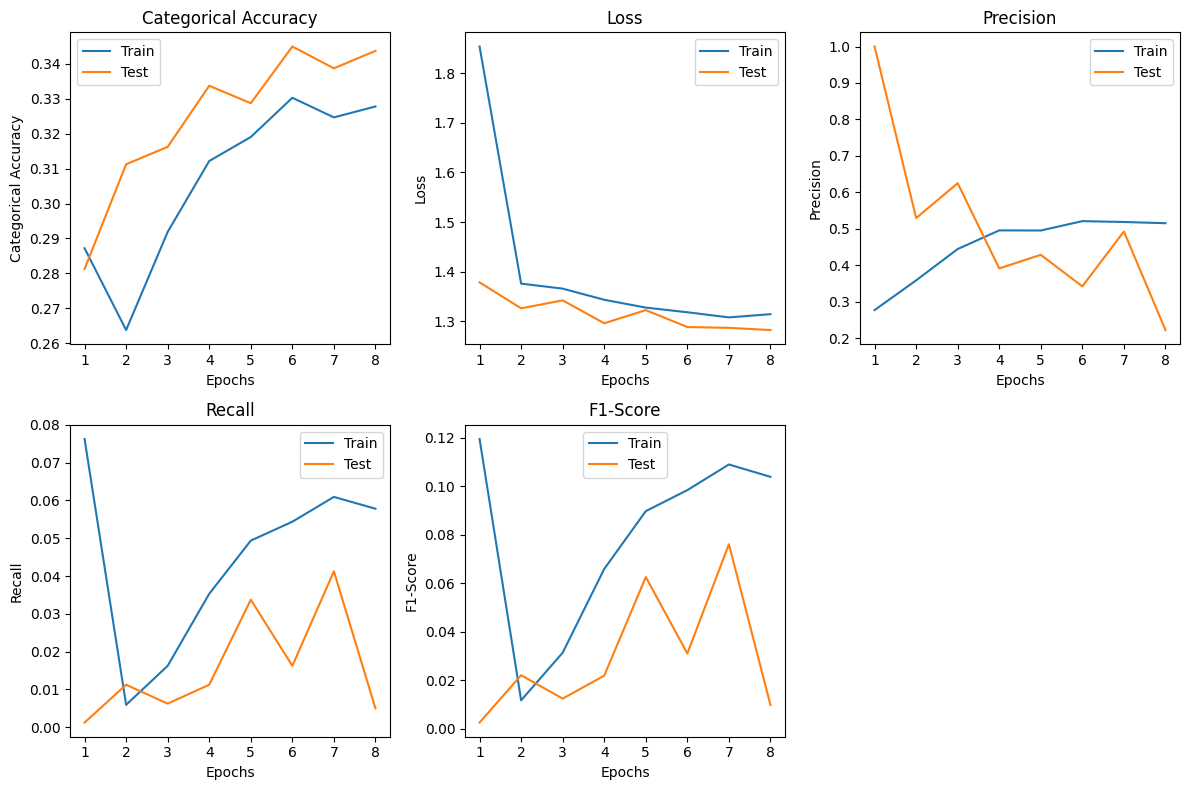

In [64]:
plot_metrics(trained)

# PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

In [ ]:
class FirstModel(nn.Module):
    def __init__(self, num_classes=4):
        super(FirstModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout2d(p=0.20)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.dropout2 = nn.Dropout2d(p=0.20)
        self.fc1 = nn.Linear(32 * 16 * 16, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 32 * 16 * 16)
        x = self.fc1(x)
        return x

class EmotionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for class_name in self.classes:
            class_path = os.path.join(self.root_dir, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                images.append((img_path, self.class_to_idx[class_name]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
torch.manual_seed(42)

# Zmiana wielkości obrazków
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Stworzenie osobnych datasetów i dataloaderów (zdjęcia zostały podzielone na dwa folderu w propocjach 80-20, każdy typ po równo)
train_dataset = EmotionDataset(root_dir='work/Dog_t', transform=transform)
test_dataset = EmotionDataset(root_dir='work/Dog_v', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Inicjalizacja modelu, funkcji straty i optimizerar
model = FirstModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Listy do przechowywania metryk
train_accuracies = []
val_accuracies = []

train_losses = []
val_losses = []

train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1_scores = []
val_f1_scores = []

num_epochs = 10
# Pętla uczenia
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    all_true_labels_train = []
    all_predicted_labels_train = []

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        all_true_labels_train.extend(labels.numpy())
        all_predicted_labels_train.extend(predicted.numpy())

    # Accuracy i Loss
    train_accuracy = correct_train / total_train
    avg_train_loss = running_loss / len(train_loader)

    # Precision, Recall, F1-Score (dla każdej klasy osobny)
    train_precision = precision_score(all_true_labels_train, all_predicted_labels_train, average=None)
    train_recall = recall_score(all_true_labels_train, all_predicted_labels_train, average=None)
    train_f1 = f1_score(all_true_labels_train, all_predicted_labels_train, average=None)

    # Przechowanie wartości
    all_true_labels_train = np.array(all_true_labels_train)
    all_predicted_labels_train = np.array(all_predicted_labels_train)
    train_accuracies.append(train_accuracy)
    train_losses.append(avg_train_loss)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)


    # Pętla testowania
    model.eval()
    correct_val = 0
    total_val = 0
    all_true_labels_val = []
    all_predicted_labels_val = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            all_true_labels_val.extend(labels.numpy())
            all_predicted_labels_val.extend(predicted.numpy())

    # Accuracy i loss w tym epochu
    val_accuracy = correct_val / total_val
    avg_val_loss = running_loss / len(test_loader)

    val_accuracies.append(val_accuracy)
    val_losses.append(avg_val_loss)

    # Przekonwertowanie list na tablice Numpy
    all_true_labels_val = np.array(all_true_labels_val)
    all_predicted_labels_val = np.array(all_predicted_labels_val)

    # Precyzja, Recall i F1-Score
    val_precision = precision_score(all_true_labels_val, all_predicted_labels_val, average=None)
    val_recall = recall_score(all_true_labels_val, all_predicted_labels_val, average=None)
    val_f1 = f1_score(all_true_labels_val, all_predicted_labels_val, average=None)

    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)

    # Wypisanie statystyk epocha
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy * 100:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy * 100:.2f}%')


Epoch [1/10], Train Loss: 1.3664, Train Acc: 30.07%, Val Loss: 3.1642, Val Acc: 34.50%
Epoch [2/10], Train Loss: 1.2858, Train Acc: 36.71%, Val Loss: 2.9776, Val Acc: 38.58%
Epoch [3/10], Train Loss: 1.2052, Train Acc: 42.93%, Val Loss: 2.7910, Val Acc: 38.58%
Epoch [4/10], Train Loss: 1.1419, Train Acc: 47.79%, Val Loss: 2.6445, Val Acc: 40.58%
Epoch [5/10], Train Loss: 1.0814, Train Acc: 51.68%, Val Loss: 2.5042, Val Acc: 41.50%
Epoch [6/10], Train Loss: 1.0213, Train Acc: 55.18%, Val Loss: 2.3651, Val Acc: 42.50%
Epoch [7/10], Train Loss: 0.9389, Train Acc: 60.82%, Val Loss: 2.1744, Val Acc: 41.58%
Epoch [8/10], Train Loss: 0.8586, Train Acc: 65.82%, Val Loss: 1.9884, Val Acc: 41.33%
Epoch [9/10], Train Loss: 0.7865, Train Acc: 67.50%, Val Loss: 1.8214, Val Acc: 42.08%
Epoch [10/10], Train Loss: 0.7246, Train Acc: 71.82%, Val Loss: 1.6780, Val Acc: 41.75%


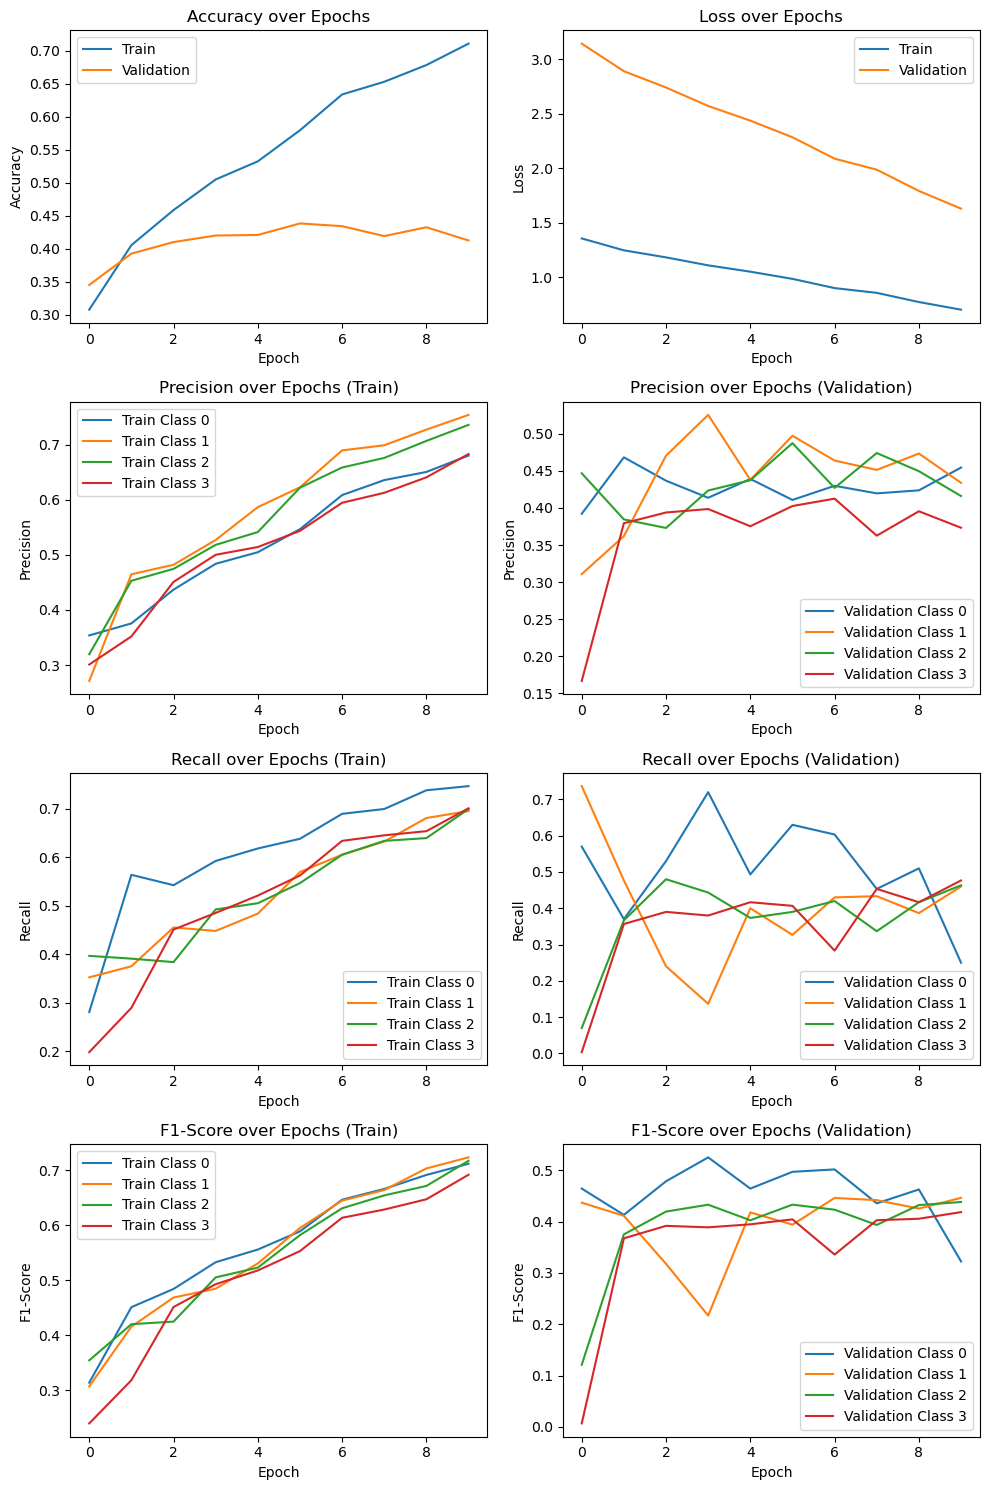

In [ ]:
plt.figure(figsize=(10, 15))

# Accuracy
plt.subplot(4, 2, 1)
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(4, 2, 2)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Precyzja dla każdej z klas
plt.subplot(4, 2, 3)
train_precisions_array = np.array(train_precisions)
for class_idx in range(num_classes):
    plt.plot(train_precisions_array[:, class_idx], label=f'Train Class {class_idx}')
plt.title('Precision over Epochs (Train)')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(4, 2, 4)
val_precisions_array = np.array(val_precisions)
for class_idx in range(num_classes):
    plt.plot(val_precisions_array[:, class_idx], label=f'Validation Class {class_idx}')
plt.title('Precision over Epochs (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Recall dla każdej z klas
plt.subplot(4, 2, 5)
train_recalls_array = np.array(train_recalls)
for class_idx in range(num_classes):
    plt.plot(train_recalls_array[:, class_idx], label=f'Train Class {class_idx}')
plt.title('Recall over Epochs (Train)')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.subplot(4, 2, 6)
val_recalls_array = np.array(val_recalls)
for class_idx in range(num_classes):
    plt.plot(val_recalls_array[:, class_idx], label=f'Validation Class {class_idx}')
plt.title('Recall over Epochs (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# F1-Score dla każdej z klas
plt.subplot(4, 2, 7)
train_f1_scores_array = np.array(train_f1_scores)
for class_idx in range(num_classes):
    plt.plot(train_f1_scores_array[:, class_idx], label=f'Train Class {class_idx}')
plt.title('F1-Score over Epochs (Train)')
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.legend()

plt.subplot(4, 2, 8)
val_f1_scores_array = np.array(val_f1_scores)
for class_idx in range(num_classes):
    plt.plot(val_f1_scores_array[:, class_idx], label=f'Validation Class {class_idx}')
plt.title('F1-Score over Epochs (Validation)')
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.legend()

plt.tight_layout()
plt.show()

# Pierwsze testy: GridSearch i Optuna

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(192, 192, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

keras_model = KerasClassifier(build_fn=create_model, epochs=2, batch_size=32, verbose=0)

# Siatka parametrów
param_grid = {
    'optimizer': ['adam', 'sgd']
}

grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_result = grid.fit(X_train, y_train)

# Podsumowanie danych
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


ERROR! Session/line number was not unique in database. History logging moved to new session 213
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras

Best: 0.284993 using {'optimizer': 'adam'}
0.284993 (0.020458) with: {'optimizer': 'adam'}
0.248750 (0.004210) with: {'optimizer': 'sgd'}


In [ ]:
import optuna
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_model(trial):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(192, 192, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.0, 0.5)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.0, 0.5)))

    model.add(Flatten())

    model.add(Dense(trial.suggest_int('dense_units', 32, 256)))
    model.add(Activation('relu'))
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.0, 0.5)))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.0, 0.5)))

    model.add(Dense(4, activation='softmax'))

    optimizer_name = trial.suggest_categorical('optimizer', ['adam'])
    optimizer_lr = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)

    optimizer = Adam(learning_rate=optimizer_lr)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

def objective(trial):
    X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.30, random_state=42)

    model = create_model(trial)

    model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), verbose=0)

    score = model.evaluate(X_val, y_val, verbose=0)
    return score[1]  # Accuracy na zbiorze testowym będzie wyznacznikiem


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-01-03 13:46:10,443] A new study created in memory with name: no-name-1bb060f0-aa98-407a-a232-faa62c0be317
[I 2024-01-03 13:46:45,859] Trial 0 finished with value: 0.33000001311302185 and parameters: {'dropout_rate': 0.1684147085488099, 'dense_units': 157, 'optimizer': 'adam', 'learning_rate': 0.011976668238429975}. Best is trial 0 with value: 0.33000001311302185.
[I 2024-01-03 13:47:29,757] Trial 1 finished with value: 0.26499998569488525 and parameters: {'dropout_rate': 0.45036594700348864, 'dense_units': 189, 'optimizer': 'adam', 'learning_rate': 0.053854885720408606}. Best is trial 0 with value: 0.33000001311302185.
[I 2024-01-03 13:48:01,145] Trial 2 finished with value: 0.4258333444595337 and parameters: {'dropout_rate': 0.0389467028837342, 'dense_units': 160, 'optimizer': 'adam', 'learning_rate': 4.725697666968295e-05}. Best is trial 2 with value: 0.4258333444595337.
[I 2024-01-03 13:48:44,956] Trial 3 finished with value: 0.3400000035762787 and parameters: {'dropout_rate

Number of finished trials:  10
Best trial:
Value:  0.4258333444595337
Params: 
    dropout_rate: 0.0389467028837342
    dense_units: 160
    optimizer: adam
    learning_rate: 4.725697666968295e-05


### Przetestowanie modelu z "najlepszymi" parametrami.

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization
from keras.utils import to_categorical
def testModel(dropout, learning_rate, dense_units):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', input_shape=(192, 192, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))

  model.add(Flatten())

  model.add(Dense(dense_units))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))

  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))

  model.add(Dense(4, activation='softmax'))

  optimizer = Adam(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy',
                    optimizer=optimizer,
                    metrics=['accuracy'])
  return model

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.30, random_state=42)
model = testModel(0.0389467028837342, 4.725697666968295e-05, 160)
trained = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
88/88 [==============================] - 9s 75ms/step - loss: 1.6041 - accuracy: 0.2993 - val_loss: 1.3738 - val_accuracy: 0.3142
Epoch 2/10
88/88 [==============================] - 6s 71ms/step - loss: 1.3267 - accuracy: 0.3557 - val_loss: 1.3069 - val_accuracy: 0.3658
Epoch 3/10
88/88 [==============================] - 6s 71ms/step - loss: 1.2039 - accuracy: 0.4496 - val_loss: 1.2625 - val_accuracy: 0.3900
Epoch 4/10
88/88 [==============================] - 6s 68ms/step - loss: 1.1023 - accuracy: 0.4996 - val_loss: 1.2378 - val_accuracy: 0.3975
Epoch 5/10
88/88 [==============================] - 6s 66ms/step - loss: 1.0319 - accuracy: 0.5614 - val_loss: 1.2615 - val_accuracy: 0.3983
Epoch 6/10
88/88 [==============================] - 6s 70ms/step - loss: 0.9178 - accuracy: 0.6096 - val_loss: 1.2670 - val_accuracy: 0.4050
Epoch 7/10
88/88 [==============================] - 6s 71ms/step - loss: 0.8206 - accuracy: 0.6696 - val_loss: 1.2863 - val_accuracy: 0.4133
Epoch 8/10
88

### Overfitting jest zbyt duży, dropout musi zostać zwiększony. Przetestowanie drugiego "najlepszego" modelu (ze zmniejszeniem dropoutu do 0.20, ponieważ 0.36 to za dużo)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.30, random_state=42)
model = testModel(0.2, 2.2132446918956667e-05, 217)
trained = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
88/88 [==============================] - 8s 73ms/step - loss: 1.5640 - accuracy: 0.2964 - val_loss: 1.3357 - val_accuracy: 0.3475
Epoch 2/20
88/88 [==============================] - 6s 70ms/step - loss: 1.3481 - accuracy: 0.3386 - val_loss: 1.3142 - val_accuracy: 0.3800
Epoch 3/20
88/88 [==============================] - 6s 68ms/step - loss: 1.3231 - accuracy: 0.3721 - val_loss: 1.2967 - val_accuracy: 0.3808
Epoch 4/20
88/88 [==============================] - 6s 72ms/step - loss: 1.3034 - accuracy: 0.3818 - val_loss: 1.2995 - val_accuracy: 0.3808
Epoch 5/20
88/88 [==============================] - 6s 72ms/step - loss: 1.2647 - accuracy: 0.3996 - val_loss: 1.2811 - val_accuracy: 0.3867
Epoch 6/20
88/88 [==============================] - 6s 71ms/step - loss: 1.2383 - accuracy: 0.4225 - val_loss: 1.2852 - val_accuracy: 0.3942
Epoch 7/20
88/88 [==============================] - 6s 73ms/step - loss: 1.2386 - accuracy: 0.4164 - val_loss: 1.2730 - val_accuracy: 0.3925
Epoch 8/20
88

### Około 43% skuteczności na zbiorze testowym przy 65% na zbiorze uczącym jest nienajgorszym punktem wyjścia.

In [ ]:
import optuna
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_model(trial):
    kernel1 = trial.suggest_categorical('kernel1', [3, 5, 7])
    kernel2 = trial.suggest_categorical('kernel2', [3, 5, 7])
    pool_s1 = trial.suggest_categorical('pool_s1', [2, 3])
    pool_s2 = trial.suggest_categorical('pool_s2', [2, 3])
    model = Sequential()
    model.add(Conv2D(32, (kernel1, kernel1), padding='same', input_shape=(192, 192, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_s1, pool_s1)))
    model.add(Dropout(0.20))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (kernel2, kernel2), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_s2, pool_s2)))
    model.add(Dropout(0.20))

    model.add(Flatten())

    model.add(Dense(217))
    model.add(Activation('relu'))
    model.add(Dropout(0.20))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.20))

    model.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=2.2132446918956667e-05)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

def objective(trial):
    X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.30, random_state=42)

    model = create_model(trial)

    model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0)

    score = model.evaluate(X_val, y_val, verbose=0)
    return score[1]

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-01-07 18:25:30,337] A new study created in memory with name: no-name-0522fd66-c1a1-4db6-a88d-67c8b6fbae37
[I 2024-01-07 18:26:55,414] Trial 0 finished with value: 0.38333332538604736 and parameters: {'kernel1': 5, 'kernel2': 5, 'pool_s1': 2, 'pool_s2': 2}. Best is trial 0 with value: 0.38333332538604736.
[I 2024-01-07 18:27:42,284] Trial 1 finished with value: 0.4283333420753479 and parameters: {'kernel1': 5, 'kernel2': 5, 'pool_s1': 3, 'pool_s2': 2}. Best is trial 1 with value: 0.4283333420753479.
[I 2024-01-07 18:29:07,063] Trial 2 finished with value: 0.4116666615009308 and parameters: {'kernel1': 3, 'kernel2': 3, 'pool_s1': 2, 'pool_s2': 3}. Best is trial 1 with value: 0.4283333420753479.
[I 2024-01-07 18:30:09,815] Trial 3 finished with value: 0.4091666638851166 and parameters: {'kernel1': 5, 'kernel2': 3, 'pool_s1': 2, 'pool_s2': 2}. Best is trial 1 with value: 0.4283333420753479.
[I 2024-01-07 18:32:35,172] Trial 4 finished with value: 0.3725000023841858 and parameters: 

Number of finished trials:  10
Best trial:
Value:  0.4283333420753479
Params: 
    kernel1: 5
    kernel2: 5
    pool_s1: 3
    pool_s2: 2


In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same', input_shape=(192, 192, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.20))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(217))
model.add(Activation('relu'))
model.add(Dropout(0.20))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.20))

model.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=2.2132446918956667e-05)
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.30, random_state=42)
trained = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
88/88 [==============================] - 6s 51ms/step - loss: 1.4694 - accuracy: 0.2961 - val_loss: 1.2982 - val_accuracy: 0.3750
Epoch 2/20
88/88 [==============================] - 4s 49ms/step - loss: 1.3341 - accuracy: 0.3393 - val_loss: 1.2793 - val_accuracy: 0.3658
Epoch 3/20
88/88 [==============================] - 4s 47ms/step - loss: 1.3146 - accuracy: 0.3582 - val_loss: 1.2773 - val_accuracy: 0.3450
Epoch 4/20
88/88 [==============================] - 4s 45ms/step - loss: 1.2815 - accuracy: 0.3757 - val_loss: 1.2638 - val_accuracy: 0.3817
Epoch 5/20
88/88 [==============================] - 4s 45ms/step - loss: 1.2562 - accuracy: 0.3929 - val_loss: 1.2495 - val_accuracy: 0.3908
Epoch 6/20
88/88 [==============================] - 4s 50ms/step - loss: 1.2382 - accuracy: 0.4150 - val_loss: 1.2469 - val_accuracy: 0.4008
Epoch 7/20
88/88 [==============================] - 4s 46ms/step - loss: 1.1964 - accuracy: 0.4368 - val_loss: 1.2416 - val_accuracy: 0.3867
Epoch 8/20
88

### Zmiana wartości parametru kernel_size w wartwach Conv2D oraz pool_size w MaxPooling2D nie zmieniła za bardzo skuteczności na zbiorze testowym, ale skuteczność na zbiorze treningowym uległa zmniejszeniu, co jest dobrym znakiem.

### Po dalszych testach, udało się stworzyć model osiągający prawie 48%.

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.metrics import Precision, Recall
import tensorflow as tf

model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same', input_shape=(192, 192, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.20))
model.add(BatchNormalization())

model.add(Conv2D(80, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(210, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(440))
model.add(Activation('relu'))
model.add(Dropout(0.20))

model.add(Dense(192))
model.add(Activation('relu'))
model.add(Dropout(0.20))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.20))

model.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=2.2132446918956667e-05)
model.compile(optimizer=optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

tf.keras.backend.clear_session()

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.30, random_state=42)
trained = model.fit(X_train, y_train, epochs=27, validation_data=(X_val, y_val))

Epoch 1/27
88/88 [==============================] - 9s 70ms/step - loss: 1.4382 - categorical_accuracy: 0.2675 - precision: 0.2284 - recall: 0.0132 - val_loss: 1.3681 - val_categorical_accuracy: 0.3183 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/27
88/88 [==============================] - 6s 66ms/step - loss: 1.3904 - categorical_accuracy: 0.2746 - precision: 0.3878 - recall: 0.0068 - val_loss: 1.3578 - val_categorical_accuracy: 0.3433 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/27
88/88 [==============================] - 6s 64ms/step - loss: 1.3596 - categorical_accuracy: 0.3139 - precision: 0.4194 - recall: 0.0093 - val_loss: 1.3314 - val_categorical_accuracy: 0.3792 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/27
88/88 [==============================] - 6s 68ms/step - loss: 1.3352 - categorical_accuracy: 0.3314 - precision: 0.5101 - recall: 0.0271 - val_loss: 1.3167 - val_categorical_accuracy: 0.3583 - val_precision: 0.6000 - val_rec

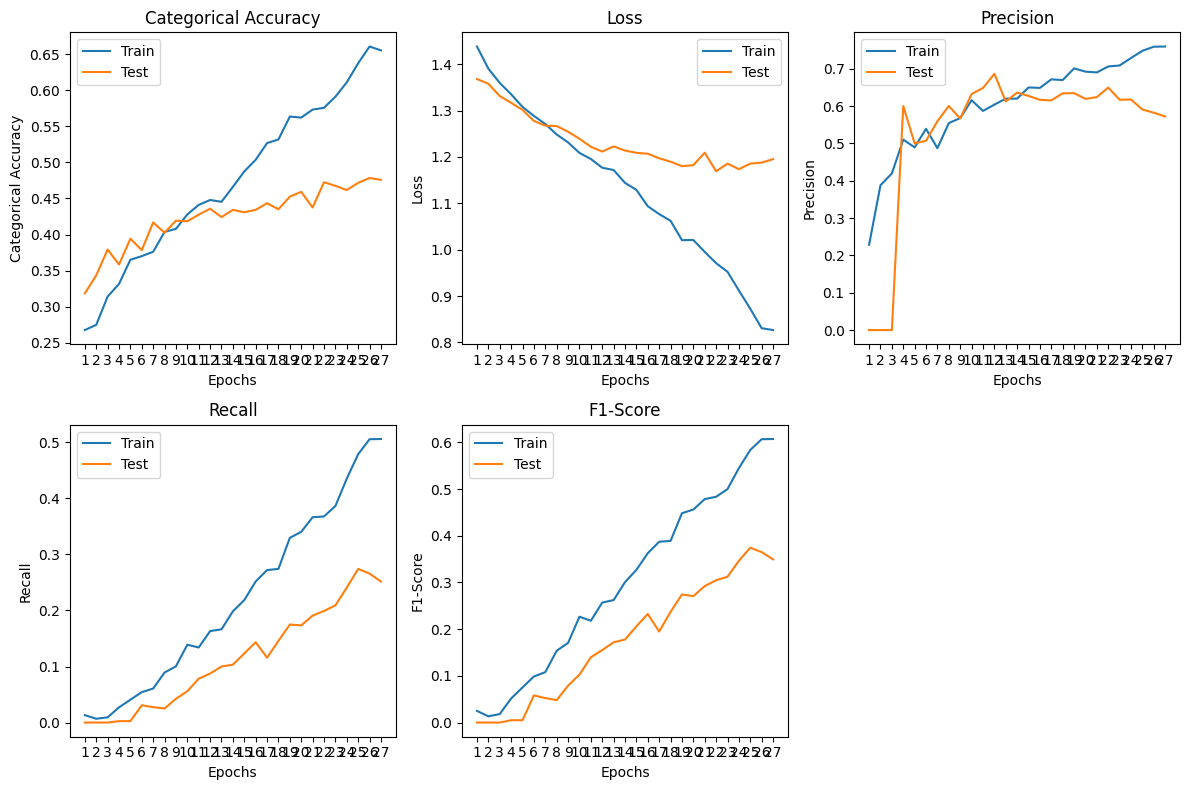

In [27]:
plot_metrics(trained)

### Jest to akceptowalny wynik biorąc pod uwagę niewielką liczbę zdjęć i trudność ocenienia emocji psa nawet przez człowieka. Najlepszy model dla tych danych, znaleziony w Internecie osiągał około 58%, jednak był on stworzony przy wykorzystaniu Inception v3 z biblioteki Keras.